In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
from sympy import *

In [71]:
data = np.loadtxt('M1.0_history_simple.out')
surface_temperature = data[:,4]
luminosity = data[:,5]
central_temperature = data[:,3]
central_density = data[:,2]
mass_fraction = data[:,6]
time = data[:,0]

data2 = np.loadtxt('M8.0_history_simple.out')
surface_temperature_8 = data2[:,4]
luminosity_8 = data2[:,5]
central_temperature_8 = data2[:,3]
central_density_8 = data2[:,2]
mass_fraction_8 = data2[:,6]
time_8 = data2[:,0]

data3 = np.loadtxt('M15.0_history_simple.out')
surface_temperature_15 = data3[:,4]
luminosity_15 = data3[:,5]
central_temperature_15 = data3[:,3]
central_density_15 = data3[:,2]
mass_fraction_15 = data3[:,6]
time_15 = data3[:,0]

Text(0, 0.5, 'Luminosity')

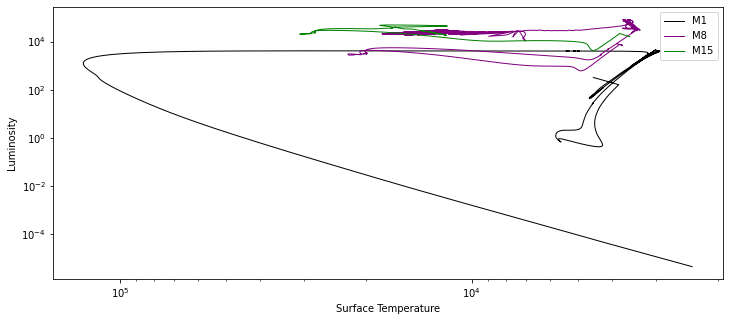

In [72]:
fig = plt.figure(figsize=(12,5))

plt.plot(surface_temperature, luminosity, lw=1, c='black', label = 'M1')
plt.plot(surface_temperature_8, luminosity_8, lw=1, c='purple', label='M8' )
plt.plot(surface_temperature_15, luminosity_15, lw=1, c='green', label= 'M15')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Surface Temperature')
plt.ylabel('Luminosity')

In [73]:
N_a = 6.022*10**23
kB = 1.38*10**(-16)
mu = 0.6135
m_e = 9.109*10**(-28)
h = 6.626 * 10**(-27)
m_h = 1.674*10**(-24)
mu_e = 1.17
sigma = 5.67*10**(-5)
simplify((20*m_e/h**2) * (math.pi/3)**(2/3) * m_h**(5/3) * mu_e**(5/3))

1.31195550334884e-13

Text(0, 0.5, 'Central Density')

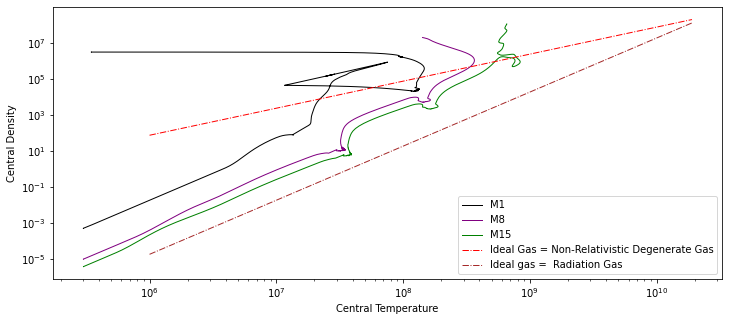

In [101]:
fig = plt.figure(figsize=(12,5))

plt.plot(central_temperature, central_density, lw=1, c='black', label = 'M1')
plt.plot(central_temperature_8, central_density_8, lw=1, c='purple', label='M8' )
plt.plot(central_temperature_15, central_density_15, lw=1, c='green', label= 'M15')

def rho(T):
    return ((N_a*kB*T/mu) * 1.31195550334885*10**(-13))**(3/2)
def density(T):
    return (4* mu * sigma * T**3) / (3 * N_a * kB * 3.0*10**10)
T = np.linspace(10**6, 19*10**9, 1000)
plt.plot(T, rho(T), lw=1.0, c="red", linestyle='-.', label = 'Ideal Gas = Non-Relativistic Degenerate Gas')
plt.plot(T,density(T), lw=1.0, c='brown', linestyle='-.', label = 'Ideal gas =  Radiation Gas')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Central Temperature')
plt.ylabel('Central Density')

Text(0, 0.5, 'time')

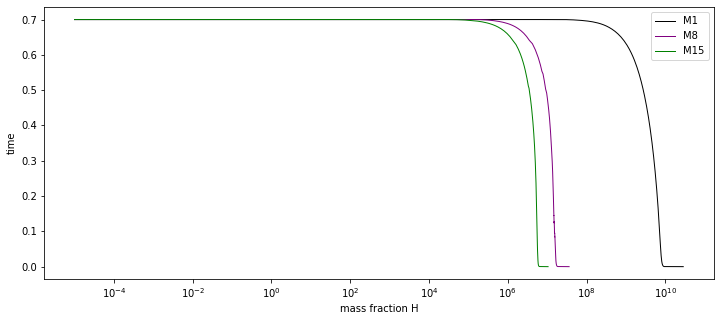

In [75]:
fig = plt.figure(figsize=(12,5))

plt.plot(time, mass_fraction, lw=1, c='black', label = 'M1')
plt.plot(time_8, mass_fraction_8, lw=1, c='purple', label='M8' )
plt.plot(time_15, mass_fraction_15, lw=1, c='green', label= 'M15')
plt.legend()
plt.xscale('log')
plt.xlabel('mass fraction H')
plt.ylabel('time')


In [76]:
data4 = np.loadtxt('M1.0_profile_H_simple.out')
rho = data4[:,2]
temp = data4[:,3]

data5 = np.loadtxt('M8.0_profile_H_simple.out')
rho_8 = data5[:,2]
temp_8 = data5[:,3]

data6 = np.loadtxt('M15.0_profile_H_simple.out')
rho_15 = data6[:,2]
temp_15 = data6[:,3]

In [77]:
beta = (N_a * kB * data4[0,2] * data4[0,3]) / (data4[0,5] * data4[0,4])
print(beta)
beta_8 = (N_a * kB * data5[0,2] * data5[0,3]) / (data5[0,5] * data5[0,4])
print(beta_8)
beta_15 = (N_a * kB * data6[0,2] * data6[0,3]) / (data6[0,5] * data6[0,4])
print(beta_15)

0.9915448417601259
0.9428351764433259
0.8715621661085688


Text(0, 0.5, 'Temperature')

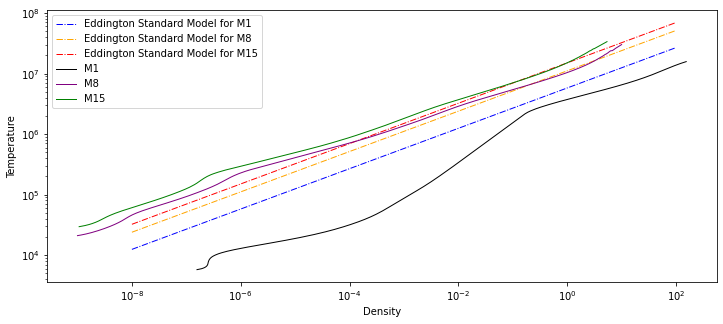

In [100]:
fig = plt.figure(figsize=(12,5))

def T1(rho1):
    return ((3 * N_a * kB * (1 - beta)) / (((4 * sigma) / (3*10**10)) * data4[0,5] * beta))**(1/3) * (rho1)**(1/3)
def T2(rho1):
    return ((3 * N_a * kB * (1 - beta_8)) / (((4 * sigma) / (3*10**10)) * data5[0,5] * beta_8))**(1/3) * (rho1)**(1/3)
def T3(rho1):
    return ((3 * N_a * kB * (1 - beta_15)) / (((4 * sigma) / (3*10**10)) * data6[0,5] * beta_15))**(1/3) * (rho1)**(1/3)
rho1 = np.linspace(10**(-8), 10**2, 1000)
plt.plot(rho1, T1(rho1),'b-.', lw=1.0, label= 'Eddington Standard Model for M1')
plt.plot(rho1, T2(rho1), lw=1.0, c='orange', linestyle='-.' , label= 'Eddington Standard Model for M8')
plt.plot(rho1, T3(rho1), lw=1.0, c='red', linestyle='-.', label= 'Eddington Standard Model for M15')

plt.plot(rho, temp,c='black', lw=1, label = 'M1')
plt.plot(rho_8, temp_8, lw=1, c='purple', label='M8' )
plt.plot(rho_15, temp_15, lw=1, c='green', label= 'M15')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Density')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

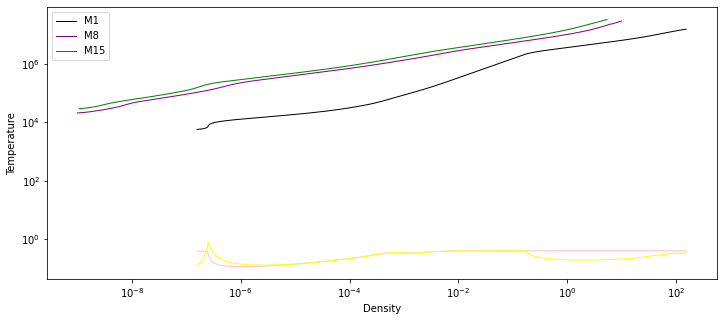

In [81]:
fig = plt.figure(figsize=(12,5))

plt.plot(rho, data4[:,10], lw=1.0, c='pink')
plt.plot(rho, data4[:,11], lw=1.0, c='yellow')

plt.plot(rho, temp, lw=1, c='black', label = 'M1')
plt.plot(rho_8, temp_8, lw=1, c='purple', label='M8' )
plt.plot(rho_15, temp_15, lw=1, c='green', label= 'M15')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Density')
plt.ylabel('Temperature')

In [84]:
data7 = np.loadtxt('M1.0_profile_He_simple.out')
rho2 = data7[:,2]
temp2 = data7[:,3]

data8 = np.loadtxt('M8.0_profile_He_simple.out')
rho_9 = data8[:,2]
temp_9 = data8[:,3]

data9 = np.loadtxt('M15.0_profile_He_simple.out')
rho_16 = data9[:,2]
temp_16 = data9[:,3]

Text(0, 0.5, 'Density')

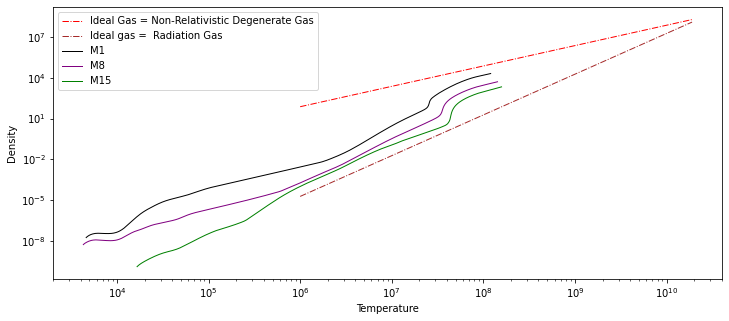

In [102]:
fig = plt.figure(figsize=(12,5))

def rho(T):
    return ((N_a*kB*T/mu) * 1.31195550334885*10**(-13))**(3/2)
def density(T):
    return (4* mu * sigma * T**3) / (3 * N_a * kB * 3.0*10**10)
T = np.linspace(10**6, 19*10**9, 1000)
plt.plot(T, rho(T), lw=1.0, c="red", linestyle='-.', label = 'Ideal Gas = Non-Relativistic Degenerate Gas')
plt.plot(T,density(T), lw=1.0, c='brown', linestyle='-.', label = 'Ideal gas =  Radiation Gas')

plt.plot(temp2, rho2, lw=1, c='black', label = 'M1')
plt.plot(temp_9, rho_9, lw=1, c='purple', label='M8' )
plt.plot(temp_16, rho_16, lw=1, c='green', label= 'M15')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature')
plt.ylabel('Density')